In [27]:
import numpy as np
from scipy.stats import norm as Normal
from scipy.misc import logsumexp
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [28]:
data = np.load("dataVMK100_2017.npy")

In [29]:
pictures = []
for n in range(data.shape[2]):
    pictures.append(data[:, :, n] / 256)
pictures = np.array(pictures)

In [30]:
def draw(pic):
    plt.figure(figsize=(pic.shape[0] / 6, pic.shape[1] / 6))
    plt.imshow(pic, cmap="Greys")
    plt.show()
    plt.close()

In [31]:
FACESHAPE = (100, 75)
face = np.random.uniform(1, 1, FACESHAPE)
background = np.random.uniform(0, 0, pictures[0].shape)
sigma = np.random.uniform(0, 1)
A = np.random.uniform(1, 1, (pictures.shape[1] - FACESHAPE[0], pictures.shape[2] - FACESHAPE[1]))
A /= A.sum()

In [32]:
def recount_d(sigma, face, background, A):
    possible_pic_pos = np.zeros((pictures.shape[0], pictures.shape[1] - FACESHAPE[0], pictures.shape[2] - FACESHAPE[1]))
    
    for n, pic in enumerate(pictures):
        background_proba = Normal.logpdf(pic, loc=background, scale=sigma)
        base = background_proba.sum()
        
        for dx in range(pic.shape[0] - FACESHAPE[0]):
            for dy in range(pic.shape[1] - FACESHAPE[1]):
                possible_pic_pos[n, dx, dy] = (base - 
                                background_proba[dx:dx + FACESHAPE[0], dy:dy + FACESHAPE[1]].sum() +
                                Normal.logpdf(pic[dx:dx + FACESHAPE[0], dy:dy + FACESHAPE[1]], loc=face, scale=sigma).sum())
        
        possible_pic_pos[n] += pic.shape[0] * pic.shape[1] * np.log(A)
        
        possible_pic_pos[n] -= possible_pic_pos[n].max()
        
        print("|", end="")
    print("")
    
    possible_pic_pos = np.exp(possible_pic_pos)
    possible_pic_pos /= possible_pic_pos.sum(axis=1).sum(axis=1)[:, np.newaxis, np.newaxis]
    return possible_pic_pos

In [33]:
def recount_teta(d):
    #A = d.sum(axis=0) + 1e-10
    #A /= A.sum()
    
    background = np.zeros((pictures[0].shape))
    face = np.zeros((FACESHAPE))
    background_precedents = np.zeros((pictures[0].shape))
    
    for n, pic in enumerate(pictures):
        for x in range(pic.shape[0] - FACESHAPE[0]):
            for y in range(pic.shape[1] - FACESHAPE[1]):
                face += pic[x:x+FACESHAPE[0], y:y+FACESHAPE[1]] * d[n, x, y]
                
                background += pic * d[n, x, y]
                background_precedents += d[n, x, y]
                
                background[x:x+FACESHAPE[0], y:y+FACESHAPE[1]] -= pic[x:x+FACESHAPE[0], y:y+FACESHAPE[1]] * d[n, x, y]
                background_precedents[x:x+FACESHAPE[0], y:y+FACESHAPE[1]] -= d[n, x, y]
        print(":", end="")
                    
    background /= background_precedents
    face /= d.sum()
    background[background_precedents == 0] = 0.5
    
    print("")
    print("recount sigma")
    
    sigma = 0
    for n, pic in enumerate(pictures):
        for x in range(pic.shape[0] - FACESHAPE[0]):
            for y in range(pic.shape[1] - FACESHAPE[1]):
                sigma += d[n, x, y] * (((pic - background)**2).sum() + 
                             ((face - pic[x:x+FACESHAPE[0], y:y+FACESHAPE[1]])**2).sum() -
                    ((background[x:x+FACESHAPE[0], y:y+FACESHAPE[1]] - pic[x:x+FACESHAPE[0], y:y+FACESHAPE[1]])**2).sum())
    
    sigma /= pictures.shape[0] * pictures.shape[1] * pictures.shape[2]
    sigma = sigma**0.5
    
    print(sigma)
    
    return sigma, face, background, A

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
recount sigma
0.444318987044


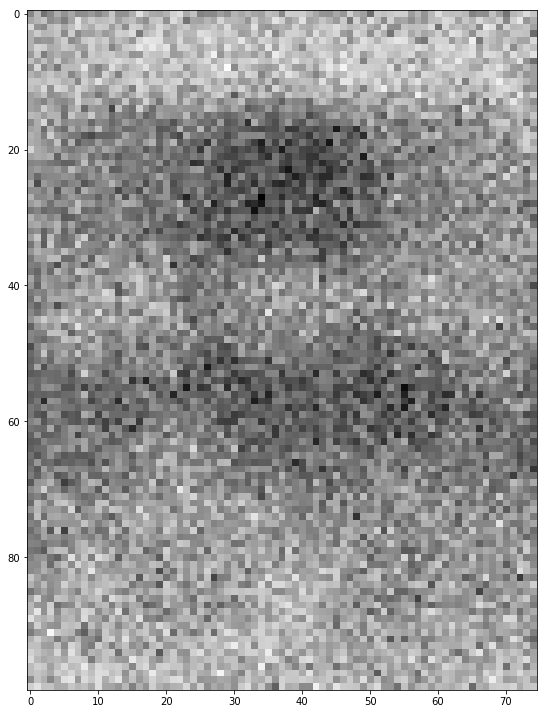

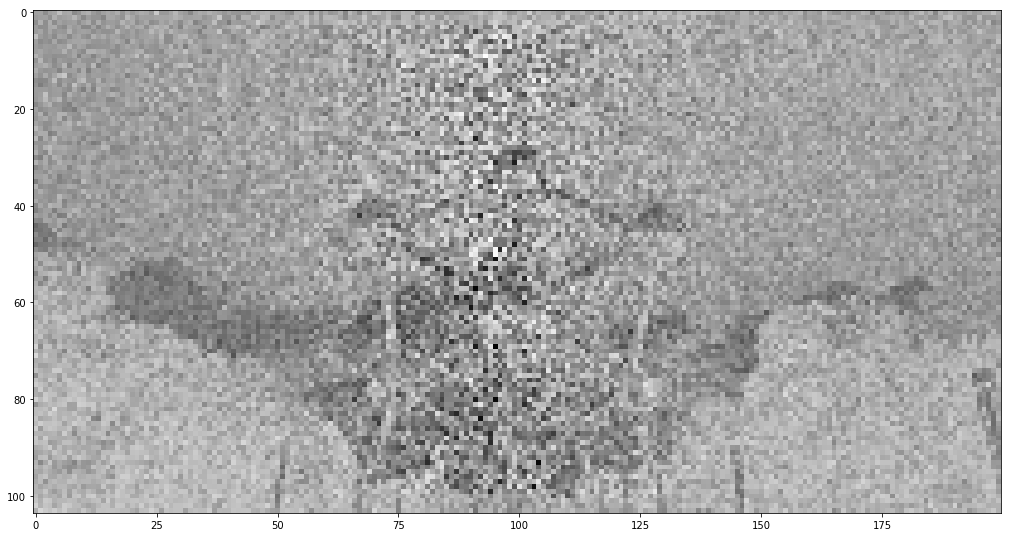

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
recount sigma
0.444318987044


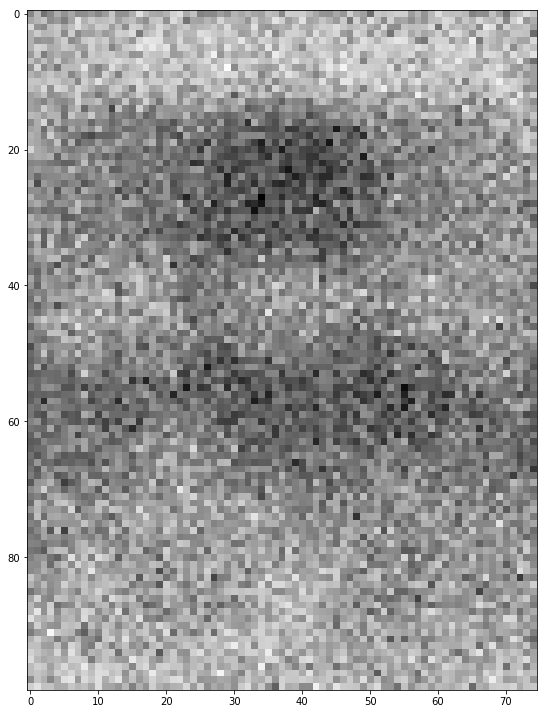

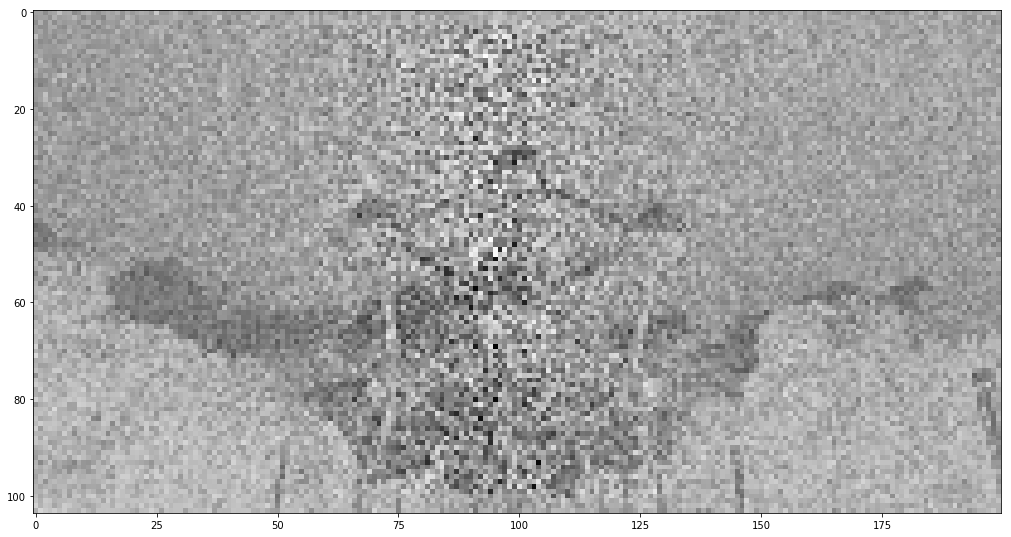

|||||||||||||||||||||||||||||

KeyboardInterrupt: 

In [34]:
for i in range(20):
    d = recount_d(sigma, face, background, A)
    print(d.max(axis=1).max(axis=1))
    sigma, face, background, A = recount_teta(d)
    
    draw(face)
    draw(background)

In [ ]:
draw(face)
draw(background)